In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [2]:
df_test = pd.read_csv('/content/drive/MyDrive/Mobiletest.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Mobiletrain.csv')

In [3]:
df_train.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df_train.describe().transpose()

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [6]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: xlabel='ram', ylabel='touch_screen'>

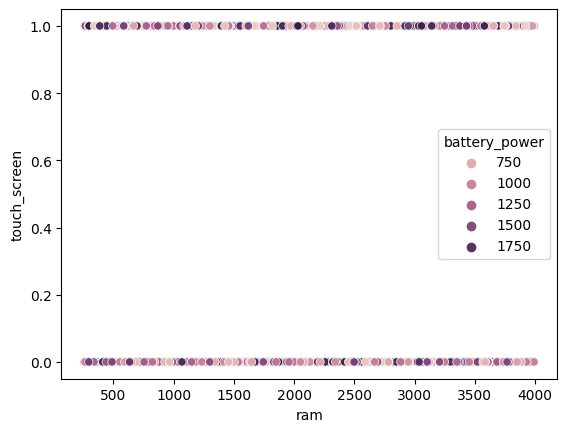

In [7]:
sns.scatterplot(data=df_train, x='ram',y='touch_screen', hue='battery_power')

<Axes: >

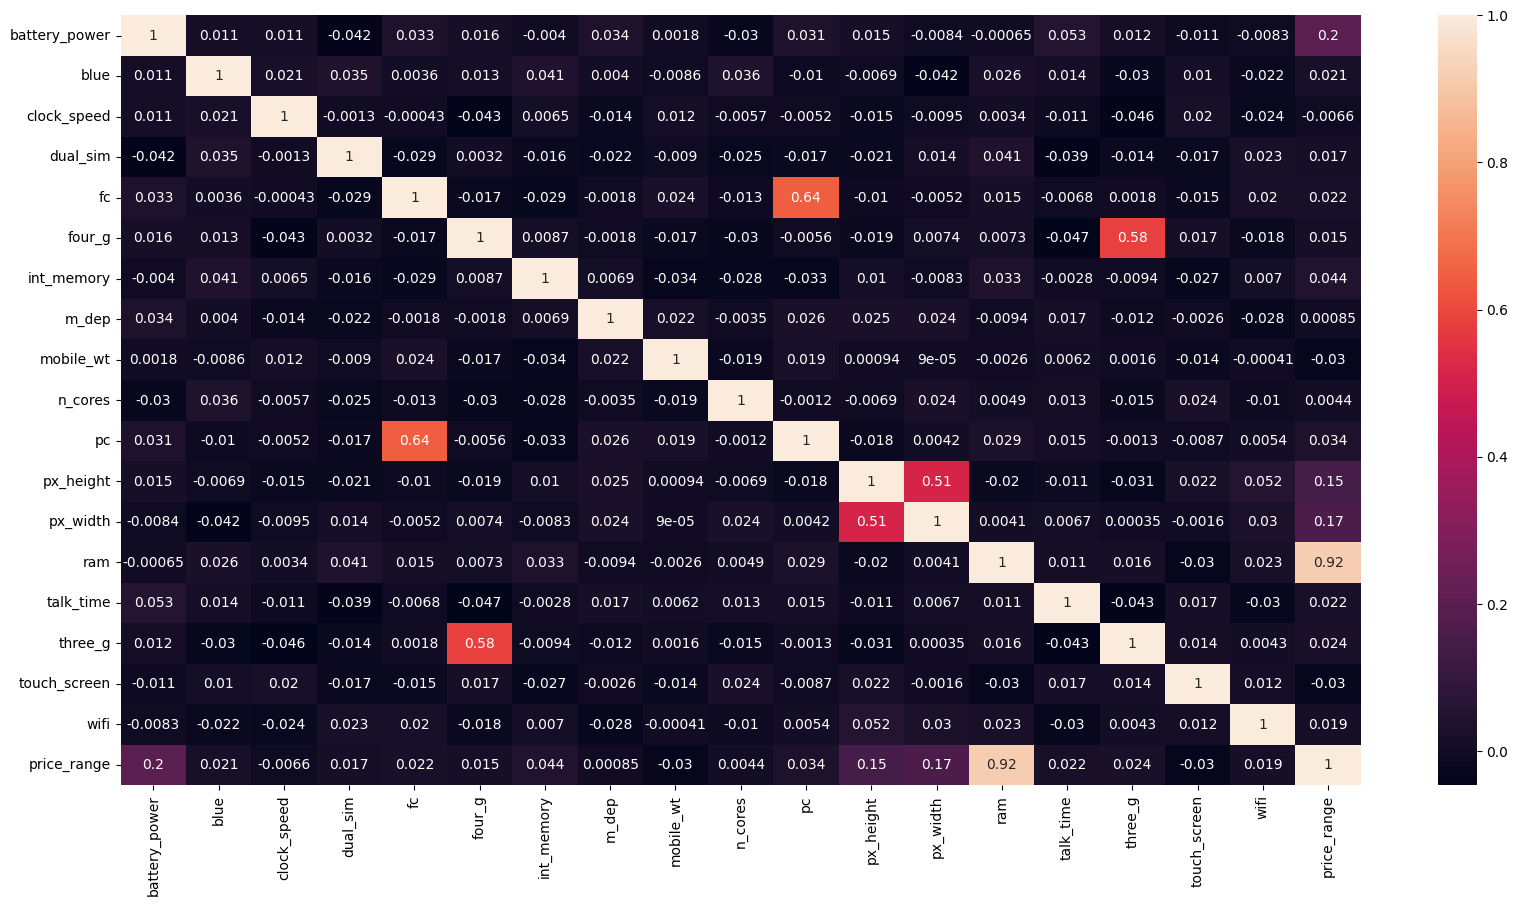

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df_train.drop(['sc_w', 'sc_h'], axis=1).corr(), annot=True)

In [9]:
X = df_train.drop('int_memory', axis=1)
y= df_train.int_memory

x_train , x_test,  y_train , y_test= train_test_split(X,y, test_size=0.2, random_state=0)

In [10]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_test = svc.predict(x_test)
y_pred_train = svc.predict(x_train)

In [11]:
from sklearn.metrics import classification_report
print('Classification report train data : ')
print(classification_report(y_train, y_pred_train))

print('Classification report test data : ')
print(classification_report(y_test, y_pred_test) )

Classification report train data : 
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        18
           5       0.13      0.07      0.09        30
           6       0.00      0.00      0.00        28
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        32
          11       0.00      0.00      0.00        30
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00        26
          14       0.03      0.54      0.06        39
          15       0.00      0.00      0.00        20
          16       0.03      0.54      0.06        39
          17       0.00      0.00      0.00        23
          18       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

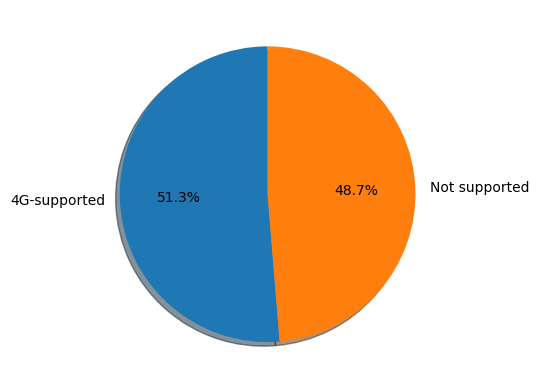

In [16]:
labels4g = ["4G-supported",'Not supported']
values4g = df_test['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

Text(0.5, 0, 'MegaPixels')

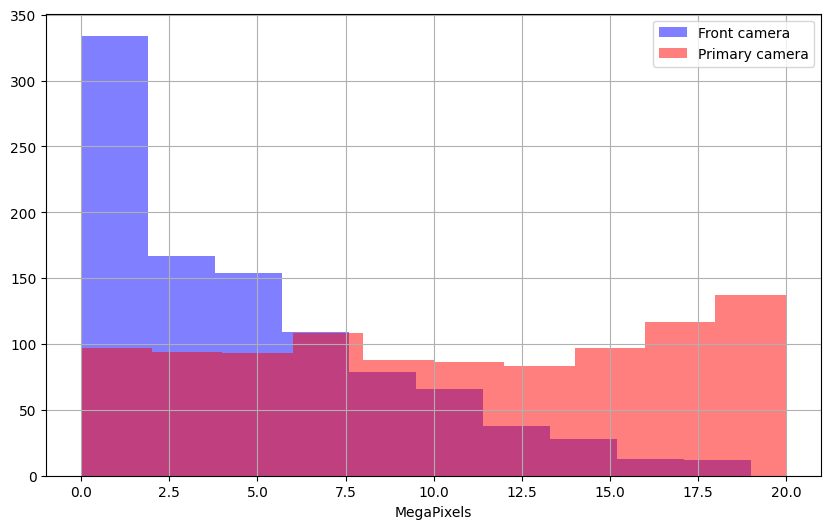

In [17]:
plt.figure(figsize=(10,6))
df_test['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df_test['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [20]:
X = df_test.drop('ram', axis=1)
y = df_test['ram']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.nunique(), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 872)               56680     
                                                                 
Total params: 62,184
Trainable params: 62,184
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 3s 30ms/step - loss: 6.8140 - accuracy: 0.0025 - val_loss: 6.8592 - val_accuracy: 0.0000e+00
Epoch 2/10
25/25 [==============================] - 0s 12ms/step - loss: 6.5935 - accuracy: 0.0125 - val_loss: 7.0386 - val_accuracy: 0.0000e+00
Epoch 3/10
25/25 [==============================] - 0s 11ms/step - loss: 6.2767 - accuracy: 0.0262 - val_loss: 7.5477 - val_accuracy: 0.0000e+00
Epoch 4/10
25/25 [==============================] - 0s 14ms/step - loss: 5.7881 - accuracy: 0.0350 - val_loss: 8.3232 - val_accuracy: 0.0000e+00
Epoch 5/10
25/25 [==============================] - 0s 7ms/step - loss: 5.1810 - accuracy: 0.0787 - val_loss: 9.1632 - val_accuracy: 0.0000e+00
Epoch 6/10
25/25 [==============================] - 0s 6ms/step - loss: 4.4621 - accuracy: 0.2025 - val_loss: 10.1262 - val_accuracy: 0.0000e+00
Epoch 7/10
25/25 [==============================] - 0s 6ms/step - loss: 3.6393 - accuracy: 0.5050 - val_loss: 11.2248 - val_accurac

In [29]:
new_mobile_features = [4, 2000, 1, 2.0, 1, 8, 1, 32, 0.8, 145, 4, 1000, 700, 4096, 5, 3, 12, 1, 1, 1]

In [30]:
new_mobile_features_scaled = scaler.transform([new_mobile_features])

prediction = model.predict(new_mobile_features_scaled)
predicted_ram_category = label_encoder.inverse_transform([np.argmax(prediction)])
print('Predicted RAM Category:', predicted_ram_category)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 203ms/step
Predicted RAM Category: [926]


***2. FASHION_MNIST DATASET***

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [32]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [34]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [36]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.5921 - accuracy: 0.7958 - val_loss: 0.4536 - val_accuracy: 0.8442
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.4241 - accuracy: 0.8500 - val_loss: 0.4052 - val_accuracy: 0.8559
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3784 - accuracy: 0.8648 - val_loss: 0.3836 - val_accuracy: 0.8638
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3557 - accuracy: 0.8732 - val_loss: 0.3827 - val_accuracy: 0.8612
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3371 - accuracy: 0.8765 - val_loss: 0.3600 - val_accuracy: 0.8699
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3235 - accuracy: 0.8823 - val_loss: 0.3534 - val_accuracy: 0.8718
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3135 - accuracy: 0.8855 - val_loss: 0.3494 - val_accuracy: 0.8746
Epo

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8783
Test accuracy: 0.8783000111579895


***3. PENGUINS DATASET***

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
df = pd.read_csv('/content/drive/MyDrive/penguins.csv')

In [41]:
df.head()

rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [42]:
df.describe()

rowid  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count  344.000000      342.000000     342.000000         342.000000   
mean   172.500000       43.921930      17.151170         200.915205   
std     99.448479        5.459584       1.974793          14.061714   
min      1.000000       32.100000      13.100000         172.000000   
25%     86.750000       39.225000      15.600000         190.000000   
50%    172.500000       44.450000      17.300000         197.000000   
75%    258.250000       48.500000      18.700000         213.000000   
max    344.000000       59.600000      21.500000         231.000000   

       body_mass_g         year  
count   342.000000   344.000000  
mean   4201.754386  2008.029070  
std     801.954536     0.818356  
min    2700.000000  2007.000000  
25%    3550.000000  2007.000000  
50%    4050.000000  2008.000000  
75%    4750.000000  2009.000000  
max    6300.000000  2009.000000

In [43]:
df.dropna(inplace=True)

In [44]:
features = ['Flipper Length (mm)', 'Beak Length (mm)', 'Beak Width (mm)', 'Body Mass (g)']
target = 'Species'

In [47]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
target = 'species'

actual_features = df.columns[3:7]
if not set(features).issubset(actual_features):
    raise ValueError("Invalid feature names provided")

X = df[features]
y = df[target]

In [48]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [50]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(len(features),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
17/17 [==============================] - 2s 16ms/step - loss: 142.0899 - accuracy: 0.3835 - val_loss: 50.4564 - val_accuracy: 0.2687
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 41.2294 - accuracy: 0.3534 - val_loss: 21.8489 - val_accuracy: 0.4627
Epoch 3/50
17/17 [==============================] - 0s 5ms/step - loss: 17.7904 - accuracy: 0.3947 - val_loss: 7.0639 - val_accuracy: 0.4776
Epoch 4/50
17/17 [==============================] - 0s 5ms/step - loss: 8.7555 - accuracy: 0.3910 - val_loss: 15.7203 - val_accuracy: 0.2687
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 12.3894 - accuracy: 0.3083 - val_loss: 9.1705 - val_accuracy: 0.5522
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 11.3414 - accuracy: 0.4398 - val_loss: 8.7677 - val_accuracy: 0.5821
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 4.8448 - accuracy: 0.5602 - val_loss: 5.5718 - val_accuracy: 0.2090
Epoch 8/50

***4.HEART_DATASET***

In [53]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [55]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=1)

Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 0.6330 - accuracy: 0.6653
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.7025
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7231
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.5268 - accuracy: 0.7397
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4989 - accuracy: 0.7603
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4740 - accuracy: 0.7810
Epoch 7/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4505 - accuracy: 0.7851
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 0.4307 - accuracy: 0.7934
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 0.4134 - accuracy: 0.8264
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3962 - accuracy: 0.8347
Epoch 11/50
8/8 [======================

In [59]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

2/2 [==============================] - 0s 25ms/step - loss: 0.3786 - accuracy: 0.8689
Accuracy: 0.868852436542511
